### Group Members: 
Apurva Padwal (apadwal2@illinois.edu);
Manpreet Kaur Gurtatta (mg70@illinois.edu);
Mausam Shah (mausam2@illinois.edu);
Vabhavi Tickoo (vtickoo2@illinois.edu);
Yanvi Soni (yanvis2@illinois.edu);                        

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import altair as alt

In [3]:
#Reading in the dataset
NetflixShowsMovies = pd.read_csv('NetflixData.csv')

### Exploring the Dataset & performing Exploratory data analysis

In [4]:
#Finding and understanding the dimentionality of Netflix Dataset
NetflixShowsMovies.shape

(5850, 15)

In [5]:
#loading first 10 values in the dataset. This will help us validate if the data load was successful.
NetflixShowsMovies.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [6]:
#Loading last 10 values of the dataset to validate if the data was loaded completely.
NetflixShowsMovies.tail(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,NaN,26,[],[],NaN,NaN,NaN,NaN,1.179,7.0
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],NaN,tt14586752,5.6,38.0,53.762,6.3
5843,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.3
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


In [7]:
#obtaining information about memory use, non-null values, and data type for each column and entire dataset.
NetflixShowsMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [8]:
#Obtaining descriptive information about the Dataset
NetflixShowsMovies.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [9]:
#Checking if the Dataset has any duplicate rows (If yes, we would get rid of them)
NetflixShowsMovies.duplicated().sum()

0

In [10]:
#Obtaining names of all the Columns in the Dataset
NetflixShowsMovies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [11]:
#Checking the Null values in the dataset
NetflixShowsMovies.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [12]:
#Replacing Null values from Age certification to "Not Rated" as there are some shows/movies that are not rated
print(NetflixShowsMovies["age_certification"].unique())
NetflixShowsMovies["age_certification"].fillna("Not Rated",inplace=True)

['TV-MA' 'R' 'PG' nan 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7' 'G'
 'NC-17']


In [13]:
#Movies usually don't have seasons, So making the seasons count from missing columns as 0
NetflixShowsMovies["seasons"].fillna(0,inplace=True)

In [14]:
#Re-checking the Null values from the dataset
NetflixShowsMovies.isnull().sum()

id                        0
title                     1
type                      0
description              18
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 403
imdb_score              482
imdb_votes              498
tmdb_popularity          91
tmdb_score              311
dtype: int64

In [15]:
#Dropping all the rows with null values
NetflixShowsMovies_New = NetflixShowsMovies.dropna()

In [16]:
#Checking if the Null values were handled/removed
NetflixShowsMovies_New.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [17]:
#Exporting the clean dataset
NetflixShowsMovies_New.to_csv('NetflixShowsMovies_Cleaned.csv', index=False)

In [18]:
#Conducting Variable Analysis on the dataset
NetflixShowsMovies_New.value_counts()

id         title                                  type   description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  release_year  age_certification  runtime  genres                                                                                            production_countries  seasons  imdb_id     imdb_score  imdb_votes  tmdb_popularity  tmdb_score
tm1000037  Je suis Karl                           MOVIE  After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them. 

In [19]:
#Grabbing Unique values for "type" type
NetflixShowsMovies_New['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [20]:
#Grabbing Unique values for "release year" type
NetflixShowsMovies_New['release_year'].unique()

array([1976, 1972, 1975, 1967, 1969, 1979, 1971, 1980, 1961, 1966, 1954,
       1958, 1977, 1963, 1956, 1960, 1973, 1974, 1959, 1978, 1989, 1990,
       1987, 1984, 1983, 1982, 1986, 1981, 1988, 1985, 2000, 1996, 1997,
       1995, 1994, 1999, 1998, 1993, 1992, 1991, 2008, 2002, 2010, 2005,
       2007, 2004, 2006, 2009, 2003, 2001, 2011, 2012, 2013, 2014, 2015,
       2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [21]:
#Grabbing Unique values for "age_certification" type
NetflixShowsMovies_New['age_certification'].unique()

array(['R', 'PG', 'Not Rated', 'TV-14', 'PG-13', 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'G', 'NC-17'], dtype=object)

In [22]:
#Grabbing Unique values for "Seasons" type
NetflixShowsMovies_New['seasons'].unique()

array([ 0.,  4.,  1.,  9., 24.,  5., 39., 10., 13., 42., 25., 21., 37.,
        8., 29.,  7., 11., 14.,  6., 32., 15., 12., 19.,  2., 20.,  3.,
       16.])

In [23]:
#Representing the seasons numbers as integers instead of decimal representation
NetflixShowsMovies_New.loc[:, 'seasons'] = NetflixShowsMovies_New['seasons'].round().astype(int)

C:\Users\apurv\AppData\Local\Temp\ipykernel_10272\3433416004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NetflixShowsMovies_New.loc[:, 'seasons'] = NetflixShowsMovies_New['seasons'].round().astype(int)


In [24]:
#Checking the change of values for "Seasons" type
NetflixShowsMovies_New['seasons'].unique()

array([ 0,  4,  1,  9, 24,  5, 39, 10, 13, 42, 25, 21, 37,  8, 29,  7, 11,
       14,  6, 32, 15, 12, 19,  2, 20,  3, 16])

#### Shows and Movies Distribution visualization

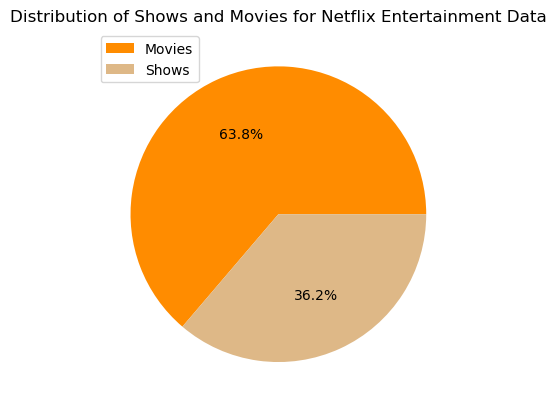

In [25]:
VizEntertainment = NetflixShowsMovies_New['type'].value_counts()
colors = ['darkorange', 'burlywood']

plt.pie(VizEntertainment,
        labeldistance=1.15, 
        autopct='%1.1f%%',
        colors=colors);
plt.title('Distribution of Shows and Movies for Netflix Entertainment Data')
plt.legend(labels=['Movies', 'Shows'], loc='upper left')
plt.show();

#### Finding relationship among different variables after data cleaning

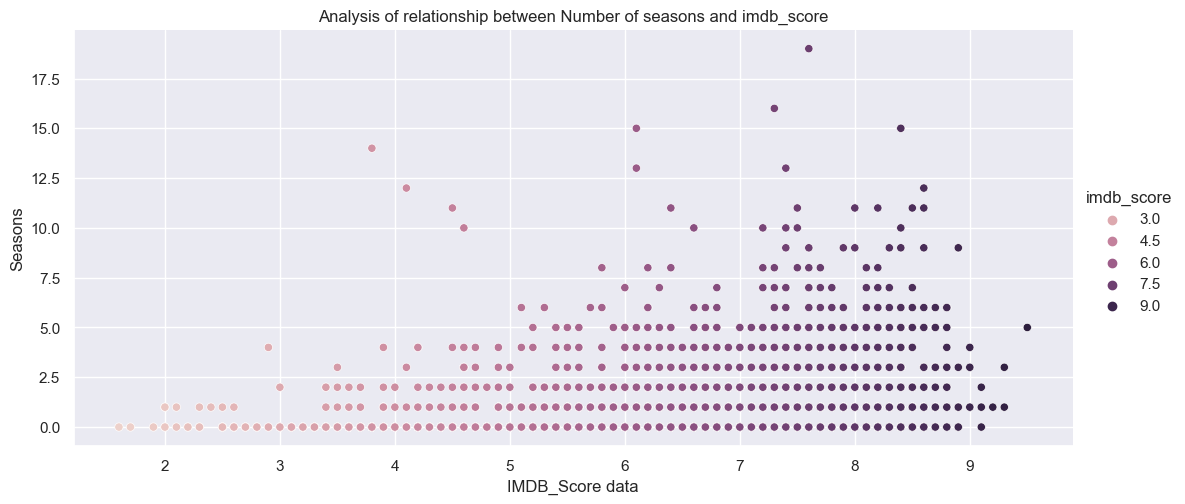

In [26]:
import seaborn as sns
sns.set() 

NewSeasons= NetflixShowsMovies_New[NetflixShowsMovies_New['seasons']<20]
sns.relplot(x="imdb_score", y="seasons", data=NewSeasons, hue="imdb_score", aspect=2.2)

plt.title('Analysis of relationship between Number of seasons and imdb_score')
plt.xlabel('IMDB_Score data')
plt.ylabel('Seasons')
plt.show()

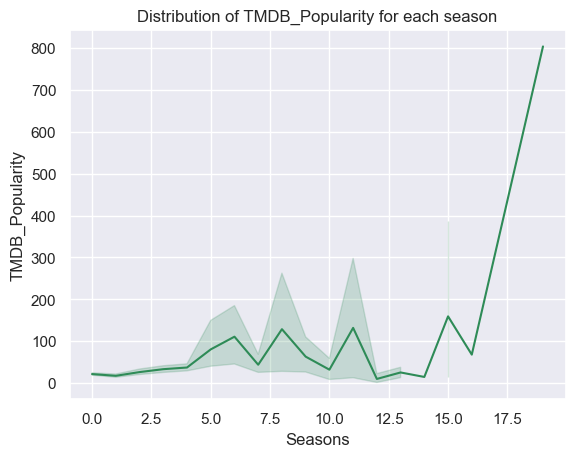

In [27]:
sns.lineplot(x='seasons', y='tmdb_popularity', data=NewSeasons, color='seagreen')

plt.title('Distribution of TMDB_Popularity for each season')
plt.xlabel('Seasons')
plt.ylabel('TMDB_Popularity')
plt.show()

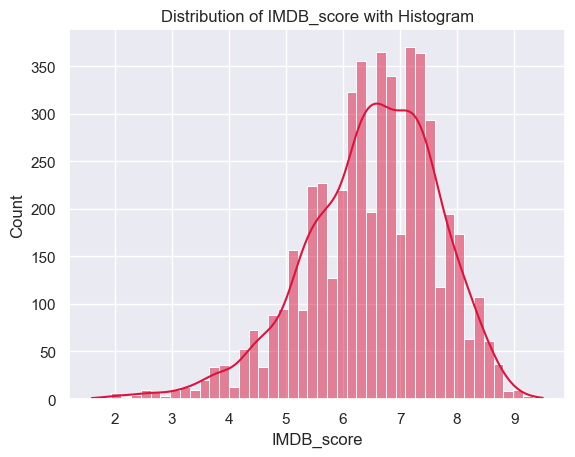

In [28]:
sns.histplot(NewSeasons['imdb_score'], kde=True, color='crimson')

plt.title('Distribution of IMDB_score with Histogram')
plt.xlabel('IMDB_score')
plt.show()

---
#### 1. Use or create an original dataset (meaning that you haven't analyzed the dataset for this class before). Be sure to explain where your dataset comes from and where it can be found (or if you made it, how you made it).

For this project, we utilized the Netflix dataset, sourced and acquired in July 2022 from Kaggle, a platform known for hosting various datasets for analysis. The dataset provides comprehensive information about TV shows and movies available on Netflix in the United States. The dataset can be accessed through the following link: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv

The dataset encompasses over 5,000 unique entries, each described by 15 columns, including:
1. ID (id): A distinct ID that allows for accurate tracking for every title on JustWatch.
2. Title (title): The film's or television program's name, which provides background information.
3. Type (show_type): This helps with content categorization by indicating whether the entry is a movie or a TV show.
4. Description (description): An encapsulated synopsis of the plot or storyline that provides an overview of the story.
5. Release Year (release_year): Indicates the year in which the title was published, providing context for the work's chronological order.
6. Age Certification (age_certification): Assures appropriateness by providing details about the suggested age group for viewers.
7. Runtime (runtime): A measure of the amount of time invested in a TV show or movie, expressed in minutes.
8. Genres (genres): A well selected set of topical groups that makes genre-based content exploration easier.
9. Production Countries (production_countries): Lists the nations in which the show/movie was created, including background information about their locations.
10. Seasons (seasons): The number of TV programme seasons that describe the episodic format of the show.
11. IMDb ID (imdb_id): IMDb's unique title identifier, or imdb_id, allows for cross-platform referencing.
12. IMDb Score (imdb_score): A numerical rating that expresses the opinion of the public regarding the reception of a title on IMDb.
13. IMDb Votes (imdb_votes): A measure of viewer involvement based on the number of votes cast on IMDb.
14. TMDb Popularity (tmdb_popularity): The Movie Database's (TMDb) popularity score that indicates the general level of audience interest.
15. TMDb Score (tmdb_score): A numerical value that offers an alternative viewpoint and indicates how well the title has been received on TMDb.

This dataset serves as the foundation for our analysis, aligning with the objectives of our project, which include using / creating an orginal dataset and performing exploratory data analysis to derive meaningful insights. The next steps involve evaluating the dataset's suitability, cleaning it, and utilizing appropriate tools to meet the project's goals.

---

---
#### 2. Identify what would make the dataset fit for use.

This dataset is fit for use because of the following reasons: 
1. The dataset is relevant to objectives of our data cleaning project, which involves cleaning and working with a diverse set of information in a dataset. The dataset contains data related to Netflix TV shows and movies which includes essential columns such as title, type, description, genres, release year, and more, providing a rich source of data for your cleaning tasks.

2. With over 5,000 unique entries and 15 columns, the dataset offers a comprehensive view of Netflix content. This richness allows for a thorough exploration of data cleaning techniques on diverse data types, such as text descriptions, numerical ratings, and categorical information.

3. The dataset includes a variety of data types, such as text, numerical, and categorical data. Working with diverse data types provides a valuable learning experience in data cleaning, allowing us to address different challenges commonly encountered in real-world datasets and analyze it to find meaningful information.

---

---
#### 3. Evaluate if the data are fit for use or if cleaning will need to be done. It cleaning will need to be done, identify the cleaning steps that will be taken

The dataset that we choose for the project needs data cleaning to make it fit for using in the project. The cleaning steps that we need to take on this dataset are as follows:
1. Identifying missing values and handling them.
2. Dealing with NULL values.
3. Avoiding duplicate values and rows.
4. Addressing the irrelevant values.
5. Replacing NULL values where required.

---

---
#### 4. Clean the dataset to make it fit for the project's use.  

The code file has the cleaned dataset, We will be sumitting the cleaned dataset as well. it is named as "NetflixShowsMovies_Cleaned.csv".

#### 5. Clean the dataset using at least one tool covered in this course (Excel, SQL, R, Python, etc.). (You don't have to use all of these!) But you need to use at least one.

We cleaned the dataset according the the steps of data cleaning that we could use. The tool that we used for our EDA is Python.

---

---
#### 6. Document the cleaning steps that were taken (in a README, or OpenRefine log, or some other documentation mechanism).

We used the following data clenaing steps:
1. Finding and Understanding the Dimensionality of the Dataset: We first returned the dimensions of the dataset, indicating the number of rows and columns. The result was a tuple where the first value represents the number of rows, and the second value represents the number of columns.

2. Loading and Displaying the First 10 Values in the Dataset: We used the head(10) function which helped us to display the first 10 rows of the dataset. This is a quick check to validate if the data loading process was successful and to get an initial glimpse of the dataset's structure and content.

3. Obtaining Information about Memory Use, Non-Null Values, and Data Types: We uitlized info() method to provide essential information about the dataset, including memory usage, the number of non-null values, and the data type of each column. This helped in understanding the data's structure and identifying potential data types or missing values.

4. Obtaining Descriptive Information about the Dataset: Then we described the dataset which provided us descriptive statistics, such as mean, standard deviation, minimum, and maximum values, for numerical columns in the dataset. This provides a quick overview of the central tendencies and distribution of numerical data.

5. Checking for Duplicate Rows: We checked for and count the number of duplicate rows in the dataset. Duplicate rows could introduce bias in analyses, so it's essential to identify and handle them appropriately.

6. Checking for Null Values in the Dataset: We used isnull().sum() method to count the number of null values in each column. This helps identify columns with missing data that may require cleaning or imputation.

7. Obtaining Names of All Columns in the Dataset: We wrote a code snippet returns a list of all column names in the dataset. Knowing the column names is crucial for referencing and manipulating specific columns.

8. Handling Null Values in "age_certification" Column: Null values in the "age_certification" column are replaced with the string "Not Rated." This is done to handle missing values in a meaningful way, considering that some shows or movies may not have a specific age certification.

9. Handling Null Values in "seasons" Column: Null values in the "seasons" column, which may apply to movies that don't have seasons, are filled with the value 0.

10. Re-checking Null Values in the Dataset: After handling null values, we rechecked the dataset to ensure that the null values have been appropriately addressed.

11. Dropping Rows with Null Values: We created a new dataset (NetflixShowsMovies_New) by dropping rows with any null values. This is an alternative approach to handling null values by removing the affected rows.

12. Checking if Null Values Were Handled/Removed: We verified whether the new dataset (NetflixShowsMovies_New) is free from null values after the removal or handling steps.

13. Conducting Variable Analysis on the Dataset: We used the value_counts() method to analyze the distribution of unique values in the dataset. This is useful for understanding the frequency of different values within each column.


Each of these steps contributes to the overall process of data exploration, understanding, and cleaning, preparing the dataset for subsequent analyses or modeling.

---

---
#### 7. Analyze the data. Were you able to answer your questions/meet your objectives with the cleaned dataset? If not, what else might need to be done?

##### Objective 1: Understand Unique Values in Key Columns

1. Type Distribution:
- Analysis: The analysis of unique values in the "type" column reveals that the dataset predominantly consists of movies, constituting a significant portion. This understanding aligns with our objective of comprehending the distribution of content types on Netflix.

2. Release Year Distribution:
- Analysis: The exploration of unique values in the "release_year" column offers insights into the temporal distribution of content on Netflix. This information allows us to observe trends, identify periods of high or low content release, and assess the dataset's temporal coverage.

3. Age Certification Distribution:
- Analysis: Examining unique values in the "age_certification" column provides a comprehensive overview of the age appropriateness of Netflix content. This insight is crucial for understanding the target audience for different shows and movies.

4. Seasons Distribution:
- Analysis: The examination of unique values in the "seasons" column, along with converting decimal representations to integers, allows us to understand the episodic nature of TV shows. This adjustment enhances the accuracy of our analysis regarding the number of seasons for each show.

##### Objective 2: Visual Representation of Shows and Movies Distribution

Analysis: The pie chart effectively visually communicates the distribution of Movies and Shows in the cleaned dataset. This graphical representation offers a clear and immediate understanding of the relative proportions of each content type.

##### Objective 3: Analyzing Relationships Among Variables

1. Relationship Between Number of Seasons and IMDb Score:
- Analysis: The scatter plot examining the relationship between the number of seasons and IMDb scores provides valuable insights into how viewer ratings vary with the duration of TV shows. The visualization helps identify potential patterns, outliers, or correlations between these variables.

2. Distribution of TMDB Popularity Across Seasons:
- Analysis: The line plot illustrating the distribution of TMDB popularity across different seasons aids in understanding the popularity trends of shows over time. This analysis can reveal whether certain seasons consistently attract more attention or if popularity varies across episodes.

3. Distribution of IMDb Scores:
- Analysis: The histogram depicting the distribution of IMDb scores offers a detailed view of how viewer ratings are spread across the dataset. This visualization is instrumental in identifying the overall sentiment of Netflix content based on IMDb scores.

##### Conclusion:

The analyses conducted on the cleaned Netflix dataset have successfully addressed the specified objectives. We've gained insights into the distribution of content types, temporal trends, age appropriateness, and the relationships among key variables. The visualizations enhance our understanding of the dataset, providing a foundation for further in-depth analyses or specific research questions. To extend our analysis, additional explorations could involve genre-based trends, actor or director influences, or viewer preferences across different demographics.

